In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [2]:
Traindata = pd.read_csv('trainRegression.csv') 
Testdata = pd.read_csv('testRegression.csv')

In [3]:
print(Traindata.head())
print(Testdata.head())

      X       R
0  0.01 -0.2730
1  0.02 -0.1170
2  0.03 -0.3090
3  0.04  0.0306
4  0.05 -0.0802
     X      R
0  0.0 -0.226
1  0.1 -0.174
2  0.2  0.459
3  0.3  0.638
4  0.4  0.869


In [4]:
print(Traindata.shape)
print(Testdata.shape)

(283, 2)
(32, 2)


In [5]:
Train_Inputs  = np.array(Traindata['X'])       
Train_Outputs = np.array(Traindata['R'])          

Test_Inputs  = np.array(Testdata['X'])
Test_Outputs = np.array(Testdata['R'])

0.14975328932247609


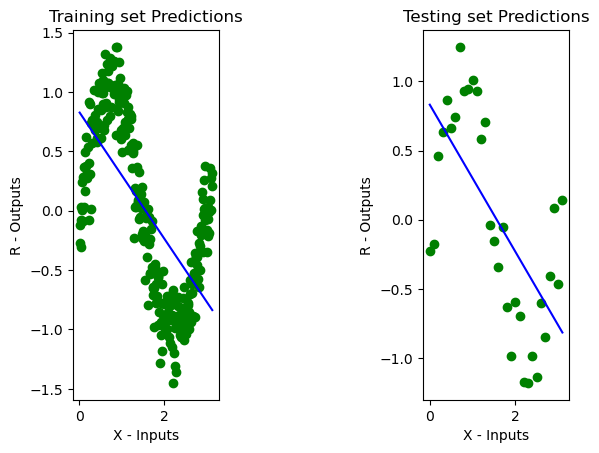

0.14953873151622765


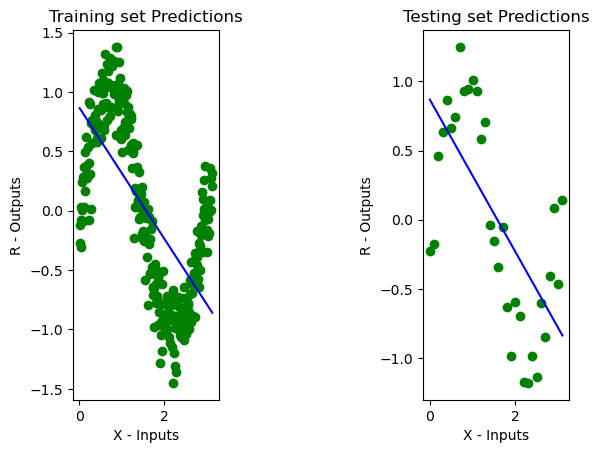

0.14953639896726073


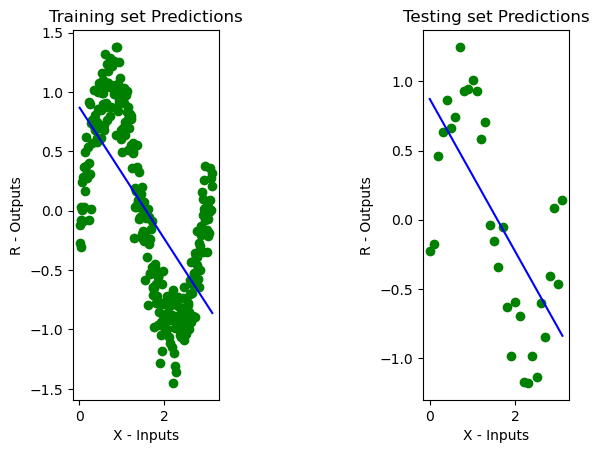

In [6]:
Etas = [0.001 , 0.01 , 0.1]
for Eta in Etas:
    Thetas = np.zeros((2,1))                      
    Updated_Thetas = np.zeros((2,1))

    Thetas[0,0] = random.uniform(0,1)             
    Thetas[1,0] = random.uniform(0,1)
    Updated_Thetas[0,0] = Thetas[0,0]
    Updated_Thetas[1,0] = Thetas[1,0]
    Flag = True
    Iterations = 0
    
    while (not(np.allclose(Updated_Thetas , Thetas)) or Flag):
        Flag = False
        
        Thetas[0,0] = Updated_Thetas[0,0]
        Thetas[1,0] = Updated_Thetas[1,0]
        
        Predictions_Train= Thetas[0,0] + (Thetas[1,0] * Train_Inputs) #Hypothesis function
        Temp0 = Thetas[0,0] - Eta * (sum(Predictions_Train - Train_Outputs) / Train_Inputs.shape[0])
        Temp1 = Thetas[1,0] - Eta * (sum((Predictions_Train - Train_Outputs)*(Train_Inputs)) / Train_Inputs.shape[0])
        Updated_Thetas[0,0] = Temp0
        Updated_Thetas[1,0] = Temp1
        
        Iterations = Iterations + 1
        

    Thetas[0,0] = Updated_Thetas[0,0]
    Thetas[1,0] = Updated_Thetas[1,0]
    Predictions_Train= Thetas[0,0] + (Thetas[1,0] * Train_Inputs)
#     print(Predictions_Train)
                                                                
    plt.subplot(1,3,1)
    plt.scatter(Train_Inputs , Train_Outputs , color='green')
    plt.plot(Train_Inputs , Predictions_Train, color = 'blue')
    plt.title('Training set Predictions')
    plt.xlabel('X - Inputs')
    plt.ylabel('R - Outputs')
    
    MSE_Train = np.sum((Predictions_Train- Train_Outputs)**2) / (2 * Train_Inputs.shape[0])
    print(MSE_Train)


    Predictions_Test = Thetas[0,0] + (Thetas[1,0] * Test_Inputs)
    
    plt.subplot(1,3,3)
    plt.scatter(Test_Inputs , Test_Outputs , color='green')
    plt.plot(Test_Inputs , Predictions_Test, color = 'blue')
    plt.title('Testing set Predictions')
    plt.xlabel('X - Inputs')
    plt.ylabel('R - Outputs')
    plt.show()
    
    
    MSE_Test = np.sum((Predictions_Test - Test_Outputs)**2) / (2 * Test_Inputs.shape[0])

In [7]:
    
    print ('Total no. of iteration for Eta: ' , Eta , ' are = ' , Iterations)
    print ("MSE on Training Data: " , MSE_Train)
    print ("MSE on Testing Data: " , MSE_Test)

    if MSE_Train == MSE_Test:
        print ('Both data sets has same MSE')
    elif MSE_Train > MSE_Test:
        print ('Training set has more MSE')
    else:
        print ('Testing set has more MSE')

Total no. of iteration for Eta:  0.1  are =  345
MSE on Training Data:  0.14953639896726073
MSE on Testing Data:  0.15795631085902673
Testing set has more MSE
